# Covid-19 - India Reports

### India beats other nations in Covid response

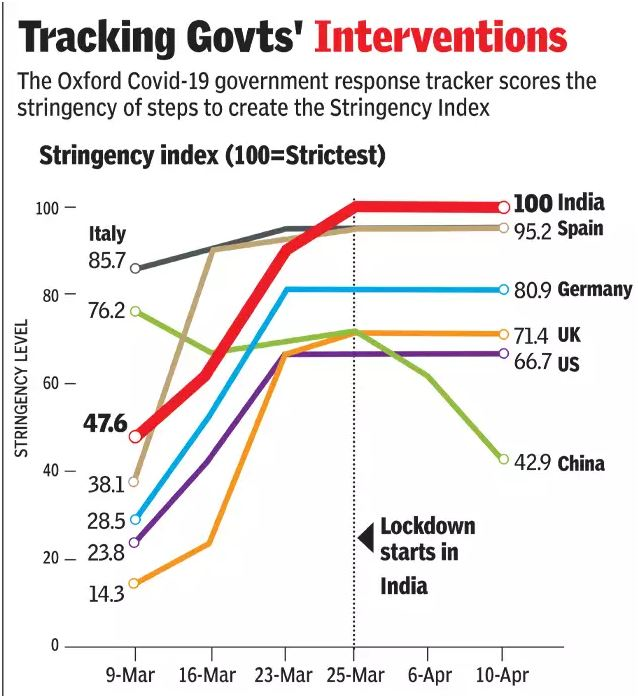

Read more at:
http://timesofindia.indiatimes.com/articleshow/75089755.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


# Global Pandemic

With China reporting more than 70k cases of the virus and cases being reported from over 100 countries icluding the USA, Australia, Cambodia, Canada, Italy, Japan, France, Malaysia, Japan, South Korea, Thailand, etc.. with a global total of confirmed cases being 182,997 the World Health Organization has declared the crisis as a Pandemic. 

## India Reports

In several cities, many people having symptoms of the virus infection are kept under observation in hospitals. According to WHO till the 17th of March a total of 129 COVID-19 cases have been reported in India. They include 112 Indian nationals, 17 foreign nationals, 10 recovered and 2 deaths. State-wise cases of COVID-19 have been reported from 13 States/UTs: Andhra Pradesh (1 case), Delhi (7 cases), Haryana (14 cases), Jammu & Kashmir (2 cases), Karnataka (6 cases), Kerala (24 cases), Ladakh (3 cases), Maharashtra (33 cases), Punjab (1 case), Rajasthan (4 cases), Telangana (3 cases), Tamil Nadu (1 case), Uttar Pradesh (12 cases) and Odisha (1 case).

**The Govt. helpline number: 011-239 78046, will remain operational. Besides the toll-free numbers,the ministry also issued a helpline email ID - ncov2019@gmail.com.**

Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/health-ministry-launches-new-toll-free-number-email-id-for-queries-on-covid-19/articleshow/74661190.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst


## Previous Work on Covid-19
1. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geo-statistical-analysis
2. https://www.kaggle.com/sauravmishra1710/covid-19-sars-cov-2-a-geographical-analysis

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Install Required Libraries...**

In [ ]:
!pip install GeoText
!pip install pgeocode

**Import Required Libraries and Packages...**

In [ ]:
# import the necessary libraries

import numpy as np 
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot, download_plotlyjs
import plotly as ply
import pycountry
import folium 
from folium import plugins
import json
from pandas.io.json import json_normalize
from geotext import GeoText
from wordcloud import WordCloud



%config InlineBackend.figure_format = 'retina'
init_notebook_mode(connected=True)

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# India Latitude Longitude
India_Latitude = 21.7679
India_Longitude = 78.8718 

In [ ]:
# Utility Functions

'''Display markdown formatted output like bold, italic bold etc.'''
def formatted_text(string):
    display(Markdown(string))


'''highlight the maximum in a Series or DataFrame'''  
def highlight_max(data, color='red'):
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
    


# Utility Plotting Functions

def plotDailyReportedCasesOverTime(df, country):
    # confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of confirmed cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Confirmed cases")

    fig.update_layout(layout)
    fig.show()

    # deaths
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of reported deaths in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Deaths Reported")

    fig.update_layout(layout)
    fig.show()

    # recovered
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(
        title=go.layout.Title(text="Daily count of recovered cases in "+ country, x=0.5),
        font=dict(size=14),
        width=800,
        height=500,
        xaxis_title = "Date",
        yaxis_title = "Recovered Cases")

    fig.update_layout(layout)
    fig.show()
    
# Cases over time
def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=1, cols=3, subplot_titles=("Comfirmed", "Deaths", "Recovered"))

    subPlot1 = go.Scatter(
                    x=df['Date'],
                    y=df['Confirmed'],
                    name="Confirmed",
                    line_color='orange',
                    opacity=0.8)

    subPlot2 = go.Scatter(
                    x=df['Date'],
                    y=df['Deaths'],
                    name="Deaths",
                    line_color='red',
                    opacity=0.8)

    subPlot3 = go.Scatter(
                    x=df['Date'],
                    y=df['Recovered'],
                    name="Recovered",
                    line_color='green',
                    opacity=0.8)

    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 1, 3)
    plot.update_layout(template="ggplot2", title_text = country + '<b> - Spread of the nCov Over Time</b>')

    plot.show()

 ## Daywise numbers of the cases reported

In [ ]:
covid_19_India = pd.read_csv("../input/covid19-in-india/covid_19_india.csv")
population_India_census2011 = pd.read_csv("../input/covid19-in-india/population_india_census2011.csv")

covid19_complete = pd.read_csv('../input/covid19-corona-virus-india-dataset/complete.csv', parse_dates=['Date'])

covid_19_India.head()

In [ ]:
# covid_19_India['Confirmed'] = covid_19_India['ConfirmedIndianNational'] + covid_19_India['ConfirmedForeignNational']
covid_19_India.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)

covid_19_India.head()

## Statewise Covid-19 Cases...

In [ ]:
# covid_India_cases = pd.read_csv('../input/coronavirus-cases-in-india/Covid cases in India.csv')

# # Coordinates of Indian States
# India_Lat_Lon = pd.read_csv('../input/coronavirus-cases-in-india/Indian Coordinates.csv')

# # Day by day data
# dbd_India = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name='India')
# dbd_Italy = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Italy")
# dbd_Korea = pd.read_excel('../input/coronavirus-cases-in-india/per_day_cases.xlsx',sheet_name="Korea")

# covid_India_cases.head()

In [ ]:
# covid_India_cases.rename(columns={'Name of State / UT': 'State', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed'}, inplace=True)

# # covid_India_cases['Confirmed'] = covid_India_cases['Total Confirmed cases (Indian National)'] + covid_India_cases['Total Confirmed cases ( Foreign National )']

# # Active Case = confirmed - deaths - recovered
# covid_India_cases['Active'] = covid_India_cases['Confirmed'] - covid_India_cases['Deaths'] - covid_India_cases['Recovered']

# covid_India_cases.style.background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
#             .background_gradient(cmap="Greens", subset=['Recovered'])\
#             .background_gradient(cmap="Reds", subset=['Deaths'])

In [ ]:
# fig = px.bar(covid_India_cases.sort_values('Confirmed', ascending=False).sort_values('Confirmed', ascending=True), 
#              x="Confirmed", y="State", title='Total Confirmed Cases', text='Confirmed', orientation='h', 
#              width=16*(max(covid_India_cases['Confirmed']) + 2), height=700, range_x = [0, max(covid_India_cases['Confirmed']) + 2])
# fig.update_traces(marker_color='#0726ed', opacity=0.8, textposition='outside')

# fig.update_layout(plot_bgcolor='rgb(208, 236, 245)')
# fig.show()

**The above state-wise data and the plot show that Kerela and Maharashtra are the 2 worst affected states in the country followed by Karnataka, Uttar Pradesh, Telengana, Rajasthan. 
As the numbers in these states are increasing and India entering it's 3rd week/phase of the spread we could possibly think (though still early to say) in terms of the community level spread.**

****Now lets see the spread day wise. India reported it's first case on 30th January. Post that for a long period of time for almost a month we did not see any rise in the cases being reported. The numbers have started to increase from the starting of March.****

# Foreign vs Indian Cases...

In [ ]:
# fig = make_subplots(rows=1, cols=2, subplot_titles=("Indian Cases","Foreign Cases"))

# # Indian Nationals
# Indian = covid_India_cases.sort_values('Total Confirmed cases (Indian National)', ascending=False).sort_values('Total Confirmed cases (Indian National)', ascending=False)

# fig.add_trace(go.Bar( y=Indian['Total Confirmed cases (Indian National)'], x=Indian["State"],  
#                      marker=dict(color=Indian['Total Confirmed cases (Indian National)'], coloraxis="coloraxis")), 1, 1)

# # Foreign Nationals
# foreign = covid_India_cases.sort_values('Total Confirmed cases ( Foreign National )', ascending=False).sort_values('Total Confirmed cases ( Foreign National )', ascending=False)

# fig.add_trace(go.Bar( y=foreign['Total Confirmed cases ( Foreign National )'], x=foreign["State"], 
#                      marker=dict(color=foreign['Total Confirmed cases ( Foreign National )'], coloraxis="coloraxis")), 1, 2)                     
                     

# fig.update_layout(coloraxis=dict(colorscale='hsv'), showlegend=False,title_text="Indian vs Foreign Cases",plot_bgcolor='rgb(255, 255, 255)')
# fig.show()

In [ ]:
# covid_19_India.info()

In [ ]:
temp = covid_19_India[["Date","Confirmed","Deaths","Recovered"]]
temp['Date'] = temp['Date'].apply(pd.to_datetime, dayfirst=True)

date_wise_data = temp.groupby(["Date"]).sum().reset_index()

formatted_text('***Day wise distribution for Confirmed, Deaths and Recovered Cases***')
# pd.set_option('display.max_rows', 100) 
# date_wise_data

### Reported Confirmed, Deaths and Recovered cases over time...

In [ ]:
temp = date_wise_data.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Confirmed'],
                 var_name='Case', value_name='Count')
# temp.head()

fig = px.area(temp, x="Date", y="Count", color='Case',title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig.show()

In [ ]:
# Load the Indian state geo json file

# with open('../input/indian-state-geojson-data/india_state_geo.json') as file:
#     ind_geo = json.load(file)

# India_conf_choropleth = go.Figure(go.Choroplethmapbox(geojson=ind_geo, locations=Covid_India_With_Location['State'],
#                                                       z=Covid_India_With_Location['TotalConfirmed'], colorscale='Sunset',
#                                                       zmin=0, zmax=max(Covid_India_With_Location.TotalConfirmed), marker_opacity=0.5, marker_line_width=0))

# India_conf_choropleth.update_layout(mapbox_style="carto-positron", mapbox_zoom=3.5, 
#                                     mapbox_center = {"lat": India_Latitude, "lon": India_Longitude})

# India_conf_choropleth.update_layout(margin={"r":10,"t":0,"l":10,"b":0})

# iplot(India_conf_choropleth)



In [ ]:
# Affected States

nCoV_States = covid_19_India['State'].unique().tolist()
print('Affected States and Union Territories...\n')
print(nCoV_States)
print("\n------------------------------------------------------------------")
print("\nTotal Affected States and Union Territories by Covid19: ",len(nCoV_States))

# India Spread Over Time...

In [ ]:
# to plot the spread over time, we would need the data distribution spread over time starting from 22nd Jan 2020
# so we will extract the sub-set from the original data.

scatterPlotCasesOverTime(date_wise_data, "<b>India</b>")

In [ ]:
# cases over time - confirmed vs deaths
plotDailyReportedCasesOverTime(date_wise_data, "INDIA")

In [ ]:
# covid19_complete.columns

In [ ]:
covid19_complete.rename(columns={'Name of State / UT': 'State_UT', 'Cured/Discharged/Migrated': 'Recovered', 'Total Confirmed cases': 'Confirmed', 'Death': 'Deaths'}, inplace=True)

for i in ['Confirmed', 'Deaths', 'Recovered']:
    covid19_complete[i] = covid19_complete[i].astype('int')

# Derived Columns
covid19_complete['Active'] = covid19_complete['Confirmed'] - covid19_complete['Deaths'] - covid19_complete['Recovered']
covid19_complete['Mortality_rate(%)'] = covid19_complete['Deaths']/covid19_complete['Confirmed'] * 100
covid19_complete['Recovery_rate(%)'] = covid19_complete['Recovered']/covid19_complete['Confirmed'] * 100

covid19_complete = covid19_complete[['Date', 'State_UT', 'Latitude', 'Longitude', 'Confirmed', 'Active', 'Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]

covid19_complete.head()

### Latest Data

In [ ]:
# Get the latest data
latest_day = max(covid19_complete['Date'])
day_before = latest_day - timedelta(days = 1)

# state wise data and new cases reported in the last day
latest_day_data = covid19_complete[covid19_complete['Date']==latest_day].set_index('State_UT')
day_before_data = covid19_complete[covid19_complete['Date']==day_before].set_index('State_UT')

temp = pd.merge(left = latest_day_data, right = day_before_data, on='State_UT', suffixes=('_latest_day', '_previous_day'), how='outer')

# Get the number of new cases reported in the last day
latest_day_data['New_cases_reported'] = temp['Confirmed_latest_day'] - temp['Confirmed_previous_day']
latest = latest_day_data.reset_index()
latest.fillna(1, inplace=True)

temp = latest[['State_UT', 'Confirmed', 'Active', 'New_cases_reported','Recovered', 'Deaths', 'Recovery_rate(%)', 'Mortality_rate(%)']]
temp = temp.sort_values('Confirmed', ascending=False).reset_index(drop=True)

temp.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active', 'New_cases_reported'])\
    .background_gradient(cmap="Greens", subset=['Recovered', 'Recovery_rate(%)'])\
    .background_gradient(cmap="Reds", subset=['Deaths', 'Mortality_rate(%)'])

ordered_latest = latest.sort_values('Confirmed', ascending=False)
# state_order = temp['State/UT']

fig = px.bar(latest.sort_values('Confirmed', ascending=False), 
             x="Confirmed", y="State_UT", color='State_UT', title='Confirmed Cases across the Country',
             orientation='h', text='Confirmed', height=700,
             color_discrete_sequence = px.colors.cyclical.IceFire)
fig.show()

In [ ]:
date_wise_data = covid19_complete[["Date", 'State_UT', "Confirmed","Deaths","Recovered",'Active']]
date_wise_data['Date'] = date_wise_data['Date'].apply(pd.to_datetime, dayfirst=True)
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

In [ ]:
temp = date_wise_data.copy()
temp['Recovery_rate(%)'] = temp['Recovered']/temp['Confirmed']*100
temp['Mortality_rate(%)'] = temp['Deaths']/temp['Confirmed']*100

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Recovery_rate(%)'],
                    mode='lines+markers',marker_color='green'))
fig.update_layout(title_text = 'Cummulative Recovery Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=temp['Date'], y=temp['Mortality_rate(%)'],
                    mode='lines+markers',marker_color='red'))
fig.update_layout(title_text = 'Cummulative Mortality Rate of India')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

### Combined Weekly Trend - India

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Confirmed'],
                    mode='lines+markers',marker_color='blue',name='Total Cases'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'],y=date_wise_data['Active'], 
                mode='lines+markers',marker_color='purple',name='Active'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Recovered'],
                mode='lines+markers',marker_color='green',name='Recovered'))

fig.add_trace(go.Scatter(x=date_wise_data['Date'], y=date_wise_data['Deaths'], 
                mode='lines+markers',marker_color='red',name='Deaths'))

fig.update_layout(title_text='Combined Weekly Trend - India',plot_bgcolor='rgb(275, 270, 273)',width=800, height=800)
fig.show()

# Patient Demographics

## Age wise trend...

In [ ]:
agegroup_data = pd.read_csv('../input/covid19-in-india/AgeGroupDetails.csv')
agegroup_data.head()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=agegroup_data['AgeGroup'],y=agegroup_data['TotalCases'],line_shape='spline',fill='tonexty',fillcolor = 'orange')) 
fig.update_layout(title="Age wise Trend...",yaxis_title="Total Number of cases",xaxis_title="Age Group")
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=800,height=600)
fig.show()

In [ ]:
temp = agegroup_data.copy()
temp['Percentage'] = temp['Percentage'].str.rstrip('%')
temp['Percentage'] = pd.to_numeric(temp['Percentage'])
temp.reset_index()
temp.set_index(["AgeGroup"], inplace = True, append = False, drop = True) 
temp

In [ ]:

plt.figure(figsize=(12,12))

temp['Percentage'].plot( kind='pie'
           , autopct='%1.1f%%'
           , shadow=True
           , startangle=90)

plt.title('Agewise Distribution - INDIA',size=25)
plt.legend(loc = "best"
           , fontsize = 12
           , ncol = 1 
           , fancybox = True
           , framealpha = 0.80
           , shadow = True
           , borderpad = 1
           , bbox_to_anchor=(1,0.5));

### Patient Level Analysis...

Data @ https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml

APIs available for public access @ https://api.covid19india.org/

* National time series, statewise stats and test counts	    https://api.covid19india.org/data.json

* State-district-wise	                                    https://api.covid19india.org/state_district_wise.json

* State-district-wise V2	                                https://api.covid19india.org/v2/state_district_wise.json

* Travel history	                                        https://api.covid19india.org/travel_history.json

* Raw data	                                            https://api.covid19india.org/raw_data.json

* States Daily changes	                                https://api.covid19india.org/states_daily.json



In [ ]:
# url = 'https://api.covid19india.org/raw_data.json'

# # Load the first sheet of the JSON file into a data frame
# df = pd.read_json(url, orient='columns')
# df1 = json_normalize(df['raw_data'])
# df1.head()

In [ ]:
covid19_patients = pd.read_csv('../input/covid19-corona-virus-india-dataset/patients_data.csv')
covid19_patients.head()

In [ ]:
covid19_patients['date_announced'] = pd.to_datetime(covid19_patients['date_announced'], dayfirst=True)
covid19_patients['status_change_date'] = pd.to_datetime(covid19_patients['status_change_date'], dayfirst=True)

In [ ]:
covid19_patients.info()

**Many values from Age and Gender information are missing. Out of the information that is available we will try to check the trend...**

In [ ]:
px.histogram(covid19_patients, x='age_bracket', color_discrete_sequence = ['#00ff95'], nbins=50, title='Age Distribution...')

In [ ]:
covid19_patients.dropna(subset=['current_status', 'age_bracket'], inplace=True)
covid19_patients.reset_index(drop=True, inplace=True)

covid19_patients_deceased = covid19_patients[covid19_patients['current_status'] == 'Deceased']
covid19_patients_hospitalized = covid19_patients[covid19_patients['current_status'] == 'Hospitalized']
covid19_patients_recovered = covid19_patients[covid19_patients['current_status'] == 'Recovered']

fig = go.Figure()
fig.add_trace(go.Box(y=covid19_patients_deceased['age_bracket'], name="Deceased Patients"))
fig.add_trace(go.Box(y=covid19_patients_hospitalized['age_bracket'], name="Hospitalized Patients"))
fig.add_trace(go.Box(y=covid19_patients_recovered['age_bracket'], name="Recovered Patients"))
fig.update_layout(title_text='Indian COVID-19 Patients Outcome Age-Wise')
fig.show()

**This above plot implies that majority of the deceased patients belong to the elderly group between thr age 55 to 70. However, the virus can affect the younger generation as well. Many of the hospitalized patients are in the age group starting from 25 to 50 years.**

### Gender

In [ ]:
px.histogram(covid19_patients, x='gender', color_discrete_sequence = ['#00aeff'], title='Gender Distribution...')

In [ ]:
temp = covid19_patients['gender'].value_counts().rename_axis('gender').reset_index(name='counts')

fig = make_subplots(
    rows=1, cols=1,
    subplot_titles = ['Gender Distribution...'],
    specs=[[{"type": "pie"}]]
)

fig.add_trace(go.Pie(values=temp.counts.tolist(), labels=['Male', 'Female'], marker_colors = ['#6a0572', '#39065a']),1,1)
fig.show()

### Current Patient Status...

In [ ]:
px.histogram(covid19_patients, x='current_status', color_discrete_sequence = ['#00aeff'], title='Current Status...')

### Total Numbers vs Current Status...

In [ ]:
fig = go.Figure()

temp = covid19_patients[['age_bracket', 'current_status']].dropna()

gen_grp = temp.groupby('current_status').count()

fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Deceased']['age_bracket'], nbinsx=50, name='Deceased', marker_color='#fd0054'))
fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Recovered']['age_bracket'], nbinsx=50, name='Recovered', marker_color='#40a798'))
fig.add_trace(go.Histogram(x=temp[temp['current_status']=='Hospitalized']['age_bracket'], nbinsx=50, name='Hospitalized', marker_color='#393e46'))

fig.update_layout(showlegend=False)
fig.update_layout(barmode='stack')
fig.update_layout(title="Agr Bracket vs Current Status")
fig.show()

### Nationality...

In [ ]:
temp = covid19_patients.groupby('nationality')['patient_number'].count().reset_index()
temp = temp.sort_values('patient_number')
# temp = temp[temp['nationality']!='India']
px.bar(temp, x='patient_number', y='nationality', orientation='h', text='patient_number', width=600,
       color_discrete_sequence = ['#eb4034'], title='Nationality - Indian Cases vs Foreign Cases...')

### Detailed Treemap - State, Ditrict, City...

In [ ]:
locations = covid19_patients.groupby(['detected_state', 'detected_district', 'detected_city'])['patient_number'].count().reset_index()
locations['country'] = 'India'
fig = px.treemap(locations, path=["country", "detected_state", "detected_district", "detected_city"], values="patient_number", height=700,
           title='State ---> District --> City', color_discrete_sequence = px.colors.qualitative.Prism)

fig.data[0].textinfo = 'label+text+value+percent entry+percent root'
fig.show()

### Days to Recovery...

In [ ]:
days_to_status_change = covid19_patients[['date_announced', 'status_change_date', 'current_status']].dropna()

days_to_status_change = days_to_status_change[days_to_status_change['status_change_date'] != days_to_status_change['date_announced']]
days_to_status_change['days_to_status_change'] = days_to_status_change['status_change_date'] - days_to_status_change['date_announced']
days_to_status_change['days_to_status_change'] = days_to_status_change['days_to_status_change'].dt.days

days_to_recover = days_to_status_change[days_to_status_change['current_status']=='Recovered']
days_to_recover.head()

In [ ]:
days_to_recover['days_to_status_change'].unique()

In [ ]:
px.box(days_to_status_change, x="current_status", y="days_to_status_change", color='current_status')

**The above plot implies that the average recovery period from the virus is normally is the range of 2 to 3 weeks. This would be the ideal range if the quarantine guidelines are strictly adhered to...**

### Patient Notes & Travel History...

In [ ]:
# print(covid19_patients['notes'].value_counts())
# print(list(covid19_patients['notes'].unique()))

In [ ]:
cities = []
countries = []

# Before extracting information from patient notes we will replace any NaN values with 'Details Awaited'
covid19_patients['notes'] = covid19_patients['notes'].replace(np.nan, 'Details awaited')

def extractTravelHistoryFromPatientNotes(patient_notes):
    
    for sent in patient_notes:
        places = GeoText(sent)

        if len(places.countries) != 0:
            for country in places.countries:
                countries.append(country)

        if len(places.cities) != 0:
            for city in places.cities:
                cities.append(city)
    
    return list(set(countries + cities))
        

patient_travelled_places = extractTravelHistoryFromPatientNotes(list(covid19_patients['notes'].unique()))

print("All Patients Travel History...\n")
print("Travelled Places:\n\n",patient_travelled_places)

### Places Visited by Infected Persons...

In [ ]:
# convert list to string and generate the word cloud

unique_string=(" ").join(patient_travelled_places)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

### Mode of Travel

The data is available from https://api.covid19india.org/ is the JSON format which can be accessed using the API -

**Travel history** - https://api.covid19india.org/travel_history.json


In [ ]:
url = 'https://api.covid19india.org/travel_history.json'

# Load the first sheet of the JSON file into a data frame
travel_history = pd.read_json(url, orient='columns')
travel_history = json_normalize(travel_history['travel_history'])


unique_string=(" ").join(list(travel_history.modeoftravel.unique()))
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [ ]:
# Indian states are not captured by GeoText library. Hence we will append the states to the places list and then parse through the notes.
Indian_States = ["Andhra Pradesh","Arunachal Pradesh ","Assam","Bihar","Chhattisgarh","Goa","Gujarat","Haryana","Himachal Pradesh","Jammu and Kashmir","Jharkhand","Karnataka",
                 "Kerala","Madhya Pradesh","Maharashtra","Manipur","Meghalaya","Mizoram","Nagaland","Odisha","Punjab","Rajasthan","Sikkim","Tamil Nadu","Telangana","Tripura",
                 "Uttar Pradesh","Uttarakhand","West Bengal","Andaman and Nicobar Islands","Chandigarh","Dadra and Nagar Haveli","Daman and Diu","Lakshadweep","Delhi","Puducherry"]

other_places = ['USA','US', 'UK', 'UAE', 'USSR', 'Middle East', 'Bilaspur', 'Allahabad', 'Bengaluru', 'Abhudhabi', 'Abu Dhabi', 'Trivandrum', 'Scotland', 'Baharain']
misc = ['travelled', 'Travel history']
full_places_list = patient_travelled_places + Indian_States + other_places + misc
place_search_pattern = '|'.join(full_places_list)

no_travel_hist = ['No travel history', 'no history of travel', 'No recent history of travel', 'no travel', 'not travelled recently', 'not travelled']
no_travel_hist_search_pattern = '|'.join(no_travel_hist)

detailes_awaited = ['Details yet to recieve', 'no details', 'details awaited', 'details unknown', 'unknown', 'yet to receive details', 'details yet to receive']
detailes_awaited_search_pattern = '|'.join(detailes_awaited)

covid19_patients['notes'] = covid19_patients['notes'].replace('Details Awaited', 'Details awaited')
covid19_patients['notes'] = np.where((covid19_patients.notes.str.contains("No Travel history", False)),'No travel history',covid19_patients.notes)
covid19_patients['notes'] = np.where((covid19_patients.notes.str.contains("under process", False)),'Details awaited',covid19_patients.notes)



# Create a temp copy dataframe...
temp = covid19_patients.copy()

primary_secondary_contact = ['father', 'mother', 'brother', 'sister', 'spouse', 'son', 'daughter', 'husband', 'wife', 'Uncle', 'Aunt', 'Family', 'relative', 'related', 'parents']
person_search_pattern = '|'.join(primary_secondary_contact)

contact_transmission = ['neighbour', 'working with', 'contact', 'transmission', 'doctor', 'nurse', 'Roommate', 'domestic worker', 'employee of', 'accompanied', 'driver']
contact_trans_search_pattern = '|'.join(contact_transmission)

temp['notes'] = np.where((temp.notes.str.contains(no_travel_hist_search_pattern, False)),'No recent travel history',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(place_search_pattern, False)),'Recent travel history',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(person_search_pattern, False)),'from family member',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(contact_trans_search_pattern, False)),'Contact Transmission',temp.notes)
temp['notes'] = np.where((temp.notes.str.contains(detailes_awaited_search_pattern, False)),'Details awaited',temp.notes)

temp = pd.DataFrame(temp.groupby('notes')['notes'].count().sort_values(ascending=False))
temp.columns = ['count']
temp = temp.reset_index()

details_awaited = temp[temp['notes'] == 'Details awaited']
temp = temp[temp['notes'] != 'Details awaited']

# changing the one long note to shorter text for clean view of the graph below...
# 'Had been admitted to AIIMS Bhubaneswar on 4th April with complaint of respiratory distress. He had history of chronic hypertension'. 
# This person could possibly have had the virus transmitted locally from a carrier person as there has been no travel history or contact reasons mentioned.

temp['notes'] = temp['notes'].replace('Had been admitted to AIIMS Bhubaneswar on 4th April with complaint of respiratory distress. He had history of chronic hypertension', 
                                      'locally transmitted')

In [ ]:
fig = px.bar(temp.head(10).sort_values('count', ascending=True), x='count', y='notes', orientation='h', text='count', width=1000,
       color_discrete_sequence = ['#3e78b5'], title='Patient History & Notes...')
fig.update_xaxes(title='')
fig.update_yaxes(title='')

fig.update_layout(
    margin=dict(l=10, r=10, t=60, b=10),
    paper_bgcolor="LightSteelBlue",)

### Other key factors from patient notes...

In [ ]:
pat_wo_travel_history = temp[temp['notes'] != 'Recent travel history']
pat_w_travel_history = temp[temp['notes'] =='Recent travel history']

colors = ['#ff2e63', '#21bf73']

pat_wo_travel_history_percent = round(pat_wo_travel_history['count'].sum()/covid19_patients['notes'].count()*100, 2)
pat_w_travel_history_percent = round(pat_w_travel_history['count'].sum()/covid19_patients['notes'].count()*100, 2)
details_awaited_percent = round(details_awaited['count'].sum()/covid19_patients['notes'].count()*100, 2)
                         
fig = px.pie(pat_w_travel_history, values=[pat_wo_travel_history_percent, pat_w_travel_history_percent, details_awaited_percent], 
             names=['Patients with no Recent Travel History', 'Patients with Recent Travel History', 'Details Awaited'],
             title='Patients with and without Travel History')
fig.show()

### Reasons for patients without travel history getting infected...

In [ ]:
other_reasons_df = covid19_patients.copy()
other_reasons_df['notes'] = np.where((other_reasons_df.notes.str.contains(place_search_pattern, False)),' ',other_reasons_df.notes)
other_reasons_df['notes'] = np.where((other_reasons_df.notes.str.contains('details awaited', False)),' ',other_reasons_df.notes)

unique_string=(" ").join(other_reasons_df['notes'])
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

# State-wise Numbers and Analysis...

### Number of States / Union Territories affected progressively...

In [ ]:
no_of_states = covid19_complete.groupby('Date')['State_UT'].unique().apply(len).values
dates = covid19_complete.groupby('Date')['State_UT'].unique().apply(len).index

fig = go.Figure()

fig.add_trace(go.Scatter(x=dates, y=[36 for i in range(len(no_of_states))], 
                         mode='lines', name='# States / Union Territory', 
                         line = dict(color='#000000', dash='dash')))

fig.add_trace(go.Scatter(x=dates, y=no_of_states, hoverinfo='x+y',
                         mode='lines', name='# Affected States / Union Territory', 
                         line = dict(color='#2dfa48')))

fig.update_layout(title='No. of affected States / Union Territory', 
                  xaxis_title='Date', yaxis_title='No. of affected States / Union Territory')

fig.update_traces(textposition='top center')
fig.update_layout(uniformtext_minsize=10, uniformtext_mode='hide')
fig.show()

In [ ]:
allStates = covid19_complete['State_UT'].unique().tolist()

print("All States/UT affected by Covid19 -- \n")
print(allStates)

print("\nTotal States/UT affected by virus: ",len(allStates))


In [ ]:
StateWiseData = pd.DataFrame(covid19_complete.groupby('State_UT')['Confirmed', 'Deaths', 'Recovered', 'Active'].max())
StateWiseData['State_UT'] = StateWiseData.index

StateWiseData = StateWiseData[['State_UT','Confirmed', 'Deaths', 'Recovered', 'Active']]
StateWiseData = StateWiseData.sort_values('Confirmed',ascending=False)

# Reset Index
StateWiseData.index = np.arange(1, len(allStates)+1)

formatted_text('***State wise Analysis of ''Confirmed'', ''Deaths'', ''Recovered'', ''Active'' Cases***')
StateWiseData

### Top 10 Affected States...

In [ ]:
top10 = StateWiseData[:10]
top10

In [ ]:
fig, axs  = plt.subplots(2,2, figsize=(15, 12))

ax_x = top10['State_UT']

ax_y0 = top10['Confirmed']
ax_y1 = top10['Deaths']
ax_y2 = top10['Recovered']
ax_y3 = top10['Active']

axs[0,0].bar(ax_x, ax_y0)
axs[0,0].set_xlabel('Top 10 State')
axs[0,0].set_ylabel('Confirmed Cases')
axs[0,0].title.set_text('Confirmed')
axs[0,0].tick_params('x', labelrotation=90)
axs[0,0].grid(axis='both')
axs[0,0].title.set_size(15)

axs[0,1].bar(ax_x, ax_y1)
axs[0,1].set_xlabel('Top 10 State')
axs[0,1].set_ylabel('Death Cases')
axs[0,1].title.set_text('Deaths')
axs[0,1].tick_params('x', labelrotation=90)
axs[0,1].grid(axis='both')
axs[0,1].title.set_size(15)

axs[1,0].bar(ax_x, ax_y2)
axs[1,0].set_xlabel('Top 10 State')
axs[1,0].set_ylabel('Recovered Cases')
axs[1,0].title.set_text('Recovered')
axs[1,0].tick_params('x', labelrotation=90)
axs[1,0].grid(axis='both')
axs[1,0].title.set_size(15)

axs[1,1].bar(ax_x, ax_y2)
axs[1,1].set_xlabel('Top 10 State')
axs[1,1].set_ylabel('Active Cases')
axs[1,1].title.set_text('Active')
axs[1,1].tick_params('x', labelrotation=90)
axs[1,1].grid(axis='both')
axs[1,1].title.set_size(15)

plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(wspace = 0.8)

fig.suptitle("Covid19 - Worst Afftected States/Union Territories - Top 10", fontsize = 24)
plt.show()

# Worst Hit States - Timeline Comparison...

### 1. Total Confirmed Cases

In [ ]:
fig = go.Figure()
state_list = list(top10.State_UT)

for i in range(len(state_list)):
    state = state_list[i]
    state_df = covid19_complete[covid19_complete.State_UT == state]

    fig.add_trace(go.Scatter(x=state_df['Date'], y=state_df['Confirmed'],
                    mode='lines+markers',name=state))

fig.update_layout(title_text='Top 10 Worst Affected State/UT for COVID19 - Confirmed Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

### 2. Total Death Toll

In [ ]:
fig = go.Figure()
state_list = list(top10.State_UT)

for i in range(len(state_list)):
    state = state_list[i]
    state_df = covid19_complete[covid19_complete.State_UT == state]

    fig.add_trace(go.Scatter(x=state_df['Date'], y=state_df['Deaths'],
                    mode='lines+markers',name=state))

fig.update_layout(title_text='Top 10 Worst Affected State/UT for COVID19 - Death Toll',plot_bgcolor='rgb(225,230,255)')
fig.show()

### 3. Recovered Cases

In [ ]:
fig = go.Figure()
state_list = list(top10.State_UT)

for i in range(len(state_list)):
    state = state_list[i]
    state_df = covid19_complete[covid19_complete.State_UT == state]

    fig.add_trace(go.Scatter(x=state_df['Date'], y=state_df['Recovered'],
                    mode='lines+markers',name=state))

fig.update_layout(title_text='Top 10 Worst Affected State/UT for COVID19 - Recovered Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

### 4. Active Cases

In [ ]:
fig = go.Figure()
state_list = list(top10.State_UT)

for i in range(len(state_list)):
    state = state_list[i]
    state_df = covid19_complete[covid19_complete.State_UT == state]

    fig.add_trace(go.Scatter(x=state_df['Date'], y=state_df['Active'],
                    mode='lines+markers',name=state))

fig.update_layout(title_text='Top 10 Worst Affected State/UT for COVID19 - Current Active Cases',plot_bgcolor='rgb(225,230,255)')
fig.show()

# INDIAN COUNCIL OF MEDICAL RESEARCH Testing...

**Homepage -** [https://icmr.nic.in/content/covid-19](https://icmr.nic.in/content/covid-19)

In [ ]:
ICMR_testing_details = pd.read_csv("../input/covid19-in-india/ICMRTestingDetails.csv")
ICMR_testing_details.drop(columns=['SNo', 'Source'], inplace = True)
print("ICMR Testing Data...")
ICMR_testing_details.tail(3)

In [ ]:
ICMR_testing_details

In [ ]:
ICMR_testing_details ['DateTime'] =pd.to_datetime(ICMR_testing_details.DateTime,dayfirst=True)
ICMR_testing_details ['DateTime'] = ICMR_testing_details ['DateTime'].dt.date

fig = go.Figure()
fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalSamplesTested'],
                    mode='lines+markers',name='TotalSamplesTested'))

fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalIndividualsTested'], 
                mode='lines+markers',name='TotalIndividualsTested'))

fig.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalPositiveCases'], 
                mode='lines+markers',name='TotalPositiveCases'))

fig.update_layout(title_text='ICMR TEST conducted for COVID19',plot_bgcolor='rgb(225,230,255)')
fig.show()
print("** Broken lines in the last week of March is because of the missing numbers for these days. Data not uploaded in the ICMR portal...")

### Covid19 - YES vs Covid19 - NO

In [ ]:
fig1 = go.Figure(data=[
    
    go.Bar(
            x=ICMR_testing_details['DateTime'], 
            y=ICMR_testing_details['TotalSamplesTested']-ICMR_testing_details['TotalPositiveCases'],
            name='COVID19 - NO',
            marker_color='#348005'),
            
    go.Bar(
            x=ICMR_testing_details['DateTime'], 
            y=ICMR_testing_details['TotalPositiveCases'],
            name='COVID19 - YES',
            marker_color='#FF0000')
          ])


# Change the bar mode
fig1.update_layout(barmode='stack', template="ggplot2",width=800, height=500, title_text = '<b>Number of Sample Tested for COVID-19 in India</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans",color='black'))
fig1.show()

### Percentage of positive cases v/s Number of Samples Tested

In [ ]:
# Create a new columns for the percentage of +ve cases detected based on the testing for the day...
ICMR_testing_details['%age_+ve_vs_total_samples_tested'] = (ICMR_testing_details['TotalPositiveCases'] / ICMR_testing_details['TotalSamplesTested']) * 100

# fig = go.Figure()
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

fig2.add_trace(go.Bar(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['TotalSamplesTested'], name='TotalSamplesTested'), secondary_y=False)

fig2.add_trace(go.Scatter(x=ICMR_testing_details['DateTime'], y=ICMR_testing_details['%age_+ve_vs_total_samples_tested'], mode='lines+markers',name='%age_+ve_vs_total_samples_tested data',
                          yaxis="y2"), secondary_y=True)
  

fig2.update_yaxes(title_text="<b>Total Samples Tested Till Date</b>", secondary_y=False)
fig2.update_yaxes(title_text="<b>Percentage of +ve Cases Detected <br></br> on Total Samples Tested</b>", secondary_y=True)

fig2.show()

print("** Broken lines in the last week of March is because of the missing numbers for these days. Data not uploaded in the ICMR portal...")

### Number of Tests v/s Confirmed Cases

In [ ]:
IND_confirmed = covid_19_India[["Date","Confirmed"]]
IND_confirmed['Date'] = IND_confirmed['Date'].apply(pd.to_datetime, dayfirst=True)
IND_confirmed = pd.DataFrame(IND_confirmed.groupby(["Date"]).sum().reset_index())

tests_by_date = ICMR_testing_details[['DateTime', 'TotalSamplesTested']]
tests_by_date.rename(columns={'DateTime':'Date'}, inplace=True)
# tests_by_date['Date'] = tests_by_date['Date'].dt.date
tests_by_date['Date'] = tests_by_date['Date'].apply(pd.to_datetime, dayfirst=True)

icmr_tests_vs_confirmed = IND_confirmed.merge(tests_by_date[['Date', 'TotalSamplesTested']], on='Date')

**Bottom line:**

    India needs to ramp up COVID-19 testing, learn from South Korea & avoid mistakes of the european countries and the United States. Testing is most important in controling the spread of 
    the virus. As it helps controls further spread of disease, if an individual is found positive for the virus, the concerned person can be put to isolation and quarantined to stop the 
    spread.

   This section, provides insights based on the data provided by [https://ourworldindata.org/covid-testing](http://https://ourworldindata.org/covid-testing).

   As per the current situation and given India's huge population, according to the Government, 
   ***India not out of woods; needs to exponentially ramp up tests***.
   
    Government officials involved in strategising India's approach to contain the pandemic said the overall social distancing model adopted by the country helped in checking spread of 
    the virus compared to many developed countries including the US which reported 3,30,000 cases. As we are somewhere in between stage-2 and stage-3 currently, "there is a need to scale 
    up testing exponentially if we want the lockdown to work" 


Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/india-not-out-of-woods-needs-to-exponentially-ramp-up-tests-experts-on-covid-19-pandemic/articleshow/75011541.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

# ICMR Testing Labs

**More Information on testing labs can be found @** 

1. https://covid.icmr.org.in/index.php/testing-facilities
2. https://covid.icmr.org.in/index.php/testing-labs-deatails

In [ ]:
ICMR_testing_labs = pd.read_csv("../input/covid19-in-india/ICMRTestingLabs.csv")
print("ICMR Testing Labs...")
ICMR_testing_labs.head()

In [ ]:
labtype = pd.DataFrame(ICMR_testing_labs.groupby('type')['city'].count()).reset_index()
labtype.rename(columns={'city': 'count'}, inplace=True)

fig = go.Figure(data=[go.Bar(x=labtype['type'], y=labtype['count'])])
# Customize aspect
fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='COVID-19 Testing Labtype - Countrywide')
fig.show()

***Labtype Insights -***

* **Government Laboratories Approved and Supported (provided diagnostic kits or reagents) by ICMR:** 139

* **Government Laboratories Found Suitable for COVID19 Testing approved by ICMR:** 4

* **Private Laboratories for COVID-19 Testing:** 67

* **Collection Sites Only:** 3

In [ ]:
labcity = pd.DataFrame(ICMR_testing_labs.groupby(['state', 'city'])['type'].count()).reset_index()
labcity.rename(columns={'type': 'count'}, inplace=True)

fig = go.Figure(data=[go.Bar(x=labcity['state'], y=labcity['count'], text=list(labcity.city))])

# Customize aspect
fig.update_traces(marker_color='rgb(49,130,189)', marker_line_color='#8B0000',
                  marker_line_width=1, opacity=0.6)

layout = go.Layout(
    barmode='stack'
)

fig.update_layout(title_text='COVID-19 Testing Lab - State - City wise Numbers')
fig.show()

In [ ]:
statelabtype = pd.DataFrame(ICMR_testing_labs.groupby(['state', 'type'])['city'].count()).reset_index()
statelabtype.rename(columns={'city': 'count'}, inplace=True)

fig = go.Figure(data=[go.Bar(x=statelabtype['state'], y=statelabtype['count'], text=list(statelabtype.type))])

# Customize aspect
fig.update_traces(marker_color='rgb(49,130,189)', marker_line_color='#8B0000',
                  marker_line_width=1, opacity=0.6)

# layout = go.Layout(
#     barmode='stack'
# )

fig.update_layout(title_text='COVID-19 Testing Lab - State - Labtype Categories')
fig.show()

# Indian Health System - Hospitals & Beds

**More Information @** https://economictimes.indiatimes.com/news/politics-and-nation/government-classifies-health-facilities-into-3-categories-for-covid-19-patient-care/articleshow/75033608.cms?from=mdr

In [ ]:
hospitals = pd.read_csv('../input/covid19-in-india/HospitalBedsIndia.csv')
hospitals.tail()

In [ ]:
hospitals['NumSubDistrictHospitals_HMIS'] = hospitals['NumSubDistrictHospitals_HMIS'].replace(np.NaN, 0)
hospitals.info()


In [ ]:
hospitals['TotalBeds'] = hospitals[['NumPublicBeds_HMIS', 'NumRuralBeds_NHP18', 'NumUrbanBeds_NHP18']].sum(axis=1)

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumPrimaryHealthCenters_HMIS,
            name='Primary Health Centers',
            marker_color='#0000FF'),
            
            go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumCommunityHealthCenters_HMIS,
            name='Community HealthCenters',
            marker_color='#8B0000'),
            
            go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumDistrictHospitals_HMIS,
            name='District Hospitals',
            marker_color='#228B22'),

            go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumSubDistrictHospitals_HMIS,
            name='Sub-District Hospitals',
            marker_color='#FFD700')])

fig.update_layout(barmode='stack', template="ggplot2",width=1200, height=700, title_text = '<b>Total Health Facilities Across Country Statewise</b>',
                  font=dict(family="Arial",color='black', size=12))
fig.show()

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumPublicBeds_HMIS,
            name='Public Beds',
            marker_color='#0000FF'),
            
            go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumUrbanBeds_NHP18,
            name='Urban Beds',
            marker_color='#8B0000'),
            
            go.Bar(
            x=hospitals['State/UT'], 
            y=hospitals.NumRuralBeds_NHP18,
            name='Rural Beds',
            marker_color='#228B22')])

fig.update_layout(barmode='stack', template="ggplot2",width=1200, height=700, title_text = '<b>Total Available Beds Across Country Statewise</b>',
                  font=dict(family="Arial",color='black', size=12))
fig.show()

**Hospital Beds Available For Every 1000 Person**

**Census data @** https://censusindia.gov.in/DigitalLibrary/Tables.aspx

Ref for the below plot - https://www.kaggle.com/vikassingh1996/indiafightscorona-covid-19-stage-ii

In [ ]:
population_india_census2k11 = pd.read_csv('../input/covid19-in-india/population_india_census2011.csv')
population_india_census2k11.rename(columns={'State / Union Territory':'State/UT'}, inplace=True)

hospital_and_population_data = hospitals.merge(population_india_census2k11[['State/UT', 'Population']], on='State/UT')

hospital_and_population_data['beds_per_1000_person'] = np.round(1000*hospital_and_population_data["TotalBeds"]/hospital_and_population_data["Population"], 2)

In [ ]:
fig1 = px.scatter(hospital_and_population_data, x='State/UT', y="beds_per_1000_person")

fig1.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), marker_color='#0000FF', mode='lines+markers')

fig1.update_layout(template="plotly_white",width=800, height=700, title_text = '<b>Number of Hospital Beds Available For Every 1000 Person</b>', font=dict(family="Arial",color='black'))

fig1.show()

**Government classifies health facilities into 3 categories for COVID-19 patient care**

    These COVID-19 dedicated facilities will have separate earmarked areas for suspected cases and confirmed cases, and ensure the available hospital bed capacity is used only for 
    moderate to severe cases of the infection.
    
    To ensure optimal utilisation of resources to provide care to novel coronavirus patients, the Union Health Ministry proposed classification of health facilities into three 
    categories COVID Care Centre, Dedicated COVID Health Centre and Dedicated COVID Hospital. These COVID-19 dedicated facilities will have separate earmarked areas for suspected 
    cases and confirmed cases, and ensure the available hospital bed capacity is used only for moderate to severe cases of the infection.
    
    The available data in India suggests that nearly 70 per cent of cases affected with the infection either exhibit mild or very mild symptoms. Such cases may not require admission to 
    COVID-19 blocks or dedicated COVID-19 hospitals. COVID Care Centres will offer care only for cases that have been clinically assigned as mild or very mild or as suspect cases, 
    according to the document.These centres can be makeshift facilities and can be set up in hostels, hotels, schools, stadiums, lodges, among other places, both public and private. If 
    the need be, existing quarantine facilities can also be converted into COVID Care Centres


Read more at:
https://economictimes.indiatimes.com/news/politics-and-nation/government-classifies-health-facilities-into-3-categories-for-covid-19-patient-care/articleshow/75033608.cms?utm_source=contentofinterest&utm_medium=text&utm_campaign=cppst

# State Level (top 10) Changes - Daily

API Details @ 

[1] https://api.covid19india.org/

[2] https://api.covid19india.org/v2/state_district_wise.json

In [ ]:
url = 'https://api.covid19india.org/v2/state_district_wise.json'
# Load the first sheet of the JSON file into a data frame
state_district_wise = pd.read_json(url, orient='columns')
state_district_wise = (pd.concat({i: json_normalize(x) for i, x in state_district_wise.pop('districtData').items()})
         .reset_index(level=1, drop=True)
         .join(state_district_wise)
         .reset_index(drop=True))

state_district_wise = state_district_wise[['state', 'district', 'confirmed']]

In [ ]:
def plotDistrictwiseNumbers(state_data, state, status):
    fig = px.bar(state_data, x='district', y=status,
             hover_data=['district', status], color=status,
             labels={'pop': status + 'cases - ' + state}, height=400)

    fig.update_layout(title_text= '<b>' + state +' Covid19 Spread Across State District wise...</b>')
    fig.show()

In [ ]:
# spelling mismatch in the top10 data and the json data.
state_list = ["Telangana" if x=="Telengana" else x for x in state_list]

In [ ]:
state = state_list[0]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[1]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[2]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[3]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[4]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[5]

state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[6]

state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[7]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[8]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

In [ ]:
state = state_list[9]
state_data = state_district_wise[state_district_wise.state == state]

plotDistrictwiseNumbers(state_data, state, 'confirmed')

# On the Map...

In [ ]:
India = folium.Map(location = [India_Latitude,India_Longitude], min_zoom=4, max_zoom=6, zoom_start=4, tiles = 'cartodbpositron')

for lat, long, confirmed, active, deaths, recovered, state in zip(latest['Latitude'],
                                                           latest['Longitude'],
                                                           latest['Confirmed'],
                                                           latest['Active'],
                                                           latest['Deaths'],
                                                           latest['Recovered'], 
                                                           latest['State_UT']):

    if (deaths == 0):
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='darkblue',icon='info-sign'), color='rgb(55, 83, 109)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(55, 83, 109)').add_to(India)

    else:
        folium.Marker(location=[lat, long]
                    , popup = ('<strong>nCov Numbers:</strong> ' + '<br>' + 
                               '<strong>State:</strong> ' + str(state).capitalize() + '<br>'
                               '<strong>Confirmed:</strong> ' + str(int(confirmed)) + '<br>'
                               '<strong>Active:</strong> ' + str(int(active)) + '<br>'
                               '<strong>Deaths:</strong> ' + str(int(deaths)) + '<br>'
                               '<strong>Recovered:</strong> ' + str(int(recovered)) + '<br>')
                    , icon=folium.Icon(color='red', icon='info-sign'), color='rgb(26, 118, 255)'
                    , tooltip = str(state).capitalize(), fill_color='rgb(26, 118, 255)').add_to(India)
        
India


# Essential Guidelines

### #IndiaFightsCorona
(COVID19-India : Patient Database @ https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#)

1.	Don't hoard groceries and essentials. Please ensure that people who are in need don't face a shortage because of you!	
2.	Be compassionate! Help those in need like the elderly and poor. They are facing a crisis which we can't even imagine!	
3.	Be considerate. While buying essentials remember that you need to share with 130 crore fellow citizens!		
4.	Going out to buy essentials? Social Distancing is KEY! Maintain at least 2 metres distance between each other in the line.	
5.	Plan ahead! Take a minute and check how much supplies you have at home. Planning lets you buy exactly what you need.
6.	Plan and calculate your essential needs for the next three weeks.						
7.	Help out the elderly by bringing them their groceries and other essentials.					
8.	Help out your employees and domestic workers by not cutting their salaries. Show the true Indian spirit!		
9.	Lockdown means LOCKDOWN! Avoid going out unless absolutely necessary. Stay safe!				
10.	Panic mode : OFF! ❌
    ESSENTIALS ARE ON! ✔️											
11.	Your essential needs will be taken care of by the government in a timely manner. Please do not hoard.		
12.	Be a true Indian. Show compassion, Be considerate,Help those in need. We will get through this!			
13.	If you have symptoms and suspect you have coronavirus - reach out to your doctor or call state helplines. 📞 Get help.	
14.	Stand against FAKE news and illegit WhatsApp forwards! Do NOT ❌ forward a message until you verify the content it contains.
15.	If you have any medical queries, reach out to your state helpline, district administration or trusted doctors!		
16.	Wash your hands with soap and water often, especially after a grocery run. Keep the virus at bay.			
17.	There is no evidence that hot weather will stop the virus! You can! Stay home, stay safe.			
18.	Help the medical fraternity by staying at home!							
19.	Avoid going out during the lockdown. Help break the chain of spread.					
20.	Call up your loved ones during the lockdown, support each other through these times.				
21.	The virus does not discriminate. Why do you? DO NOT DISCRIMINATE. We are all Indians!			
22.	Our brothers from the North-East are just as Indian as you! Help everyone during this crisis ❤️			
23.	Get in touch with your local NGO's and district administration to volunteer for this cause.			
24.	This will pass too. Enjoy your time at home and spend quality time with your family! Things will be normal soon.	
25.	#BreakTheChain of unverified WhatsApp forwards which spread wrong information! Do not forward unless you verify it.